---
title: "Discover the Julia Machine Learning  Ecosystem"
subtitle: "A Comprehensive Overview "
theme: Montpellier
author: "Daniel Molina Cabrera"
date: PyDataGlobal, 4 December 2024 
date-format: long
toc: true
toc-title: Contents
toc-depth: 1
execute:
  echo: true
  cache: true
output:
  beamer_presentation:
    slide_level: 1
format:
  html:
    code-fold: false
    code-summary: "Show Code"
    fig-width: 5
    fig-height: 3
    fig-align: left
  beamer:
    fig-width: 4
    fig-height: 2
  revealjs:
    theme: white
    fig-align: center
    fig-height: 5
    fig-cap-location: margin
    smaller: true
    logo: julia.png
    slide-number: true
---

## Disclaimer: It contains personal opinions {.center}

## About me {.smaller}

::: {.columns}

:::: {.column width="40%"}
![](images/yo_serio.png)
::::

:::: {.column width="60%"}
- Assistant Professor in University of Granada.
- Researchers in Artificial Intelligence and Intelligent Optimization.
- Teaching ML about 5 years using Python and R.
- Using Julia in research, and in a project with important enterprise.
::::

:::

# Julia is a good alternative for ML?

## Some preliminar considerations {.smaller}

- You cannot go against the technological platform of the project.

- If you are the only person who knows Julia, no-other can change it.

- Improvement of time could be important, but it depends on the project.

- It work more nicely if it is integrated in Python packages.

![Quixote against windmills](images/quijote.gif){width="40%"}

. . .

## ML Ecosystem from a global point of view

- Matrices: Package to manage matrices in CPU or GPU (Numpy, Pytorch, or JAX).

- DataFrames: To manage dataframes, read/write from CSV, Excel and other formats. It can be very complex (Pandas or Polars).

- Visualization: Packages to visualize DataFrames easily (seaborn) to the lower level package to change details (Matplotlib).

- Machine Learning: Package with the ML models that can be trained and applied.

- Deep Learning: Create DL models, training, and inference.


## Visualization of common packages
--
| Functionality                    | R                                    | Python                                                                | Julia                     |
|----------------------------------+--------------------------------------+-----------------------------------------------------------------------+--------------------------------|
|  Matrices                                | Matrix                                     | Numpy,JAX                                                 | Standard,CUDA.jl                               |
| DataFrames                       | dplyr                                | Pandas,				Polars                                | DataFrames                     |
| Visualization                    | ggplot                               | Seaborn/Matplotlib                                                    | ggplot,AlgebraOfGraphics/Makie |
| Machine			Learning | caret,				mlr3 | scikit-learn                                                          | MLJ                            |
| Deep			Learning |  Keras                                    | Pytorch,							Keras | Metalhead/Flux                 |
:	Packages		comparison	{.striped				.hover}




## Matrices

- Vectors and matrices are integrated into the standard library.

- The code is compiled and then run, so the looping is not slow.

- You can use vectorize operations (`sum`, `filter`, `map`, ...), for conciseness, not performance.

In [18]:
function distEuc(sol1, sol2)
	return sqrt(sum((sol1 - sol2).^2 ))
end

sol1 = 1:1_000
sol2 = ones(length(sol1))
distEuc(sol1, sol2)

18243.72494859534

- Any function can be vectorized adding a point after function (or before operator).

In [19]:
poly(x)=3*x+5
sol = 1:5
poly.(sol)

5-element Vector{Int64}:
  8
 11
 14
 17
 20

--- 

The performance is nearly similar:

In [20]:
using BenchmarkTools

function distEuc2(sol1, sol2)
   value = 0.0
   
	for i in eachindex(sol1, sol2)
		value += (sol1[i] - sol2[i])^2
	end
	
	return sqrt(value)
end

# Check output is the same
distEuc2(sol1, sol2) ≈ distEuc(sol1, sol2)

true

In [21]:
@btime distEuc(sol1, sol2)
@btime distEuc2(sol1, sol2)

  1.437 μs (7 allocations: 15.77 KiB)
  1.158 μs (1 allocation: 16 bytes)


18243.72494859534

# DataFrame: DataFrames.jl 

::: {.columns}

:::: {.column width="40%"}
![](images/pandas_logo.png)
::::

:::: {.column width="10%"}
VS
::::
:::: {.column width="50%"}
![](images/dataframes_logo.png){width="30%"}
::: 
:::


## DataFrames

- It one of the better packages.

- It has a great API in comparison with Pandas (easy).

. . . 

In [22]:
using CSV, DataFrames

df = CSV.read("starwars/planets.csv", missingstring="NA", DataFrame)
first(df, 3)

Row,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
,String15?,Int64?,Int64?,Int64?,String31?,String?,String?,Float64?,Int64?
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40.0,2000000000
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8.0,1000
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100.0,missing


---

Package `DataFramesMeta` of the same author make it easy to combine operators:

In [23]:
using Statistics, DataFramesMeta

df_mean = @chain df begin
    # Filter with surface of water
    @subset(:surface_water .< 40)
    # Ignoring diameter missing
    @subset(.! ismissing.(:diameter))
    # Group by climate
    @groupby(:climate)
    # Calculate the diameter_mean for climate
    @combine(:diameter_mean = mean(:diameter))
end
first(df_mean, 5)

Row,climate,diameter_mean
,String31?,Float64
1,"temperate, tropical",10200.0
2,murky,8900.0
3,temperate,32574.0
4,"temperate, arid",11370.0
5,"temperate, arid, windy",12900.0


## Extra coming from R: TidierData.jl

- Copy the R interface, more intuitive for people with experience in R.

In [24]:
using Tidier

@chain df begin
    @filter(surface_water < 40)
    @filter(!ismissing(diameter))
    @group_by(climate)
    @summarize(diameter_mean = mean(diameter))
    @slice(1:5)
end

Row,climate,diameter_mean
,String31?,Float64
1,"temperate, tropical",10200.0
2,murky,8900.0
3,temperate,32574.0
4,"temperate, arid",11370.0
5,"temperate, arid, windy",12900.0


## Advantages of DataFrames.jl

1. **Efficient**: Built on top of Julia's powerful and efficient array-based data structures.

2. **Flexible**: It supports various data sources, including CSV, TSV, Excel, and SQL databases.

3. **User-friendly**: In combination with DataFramesMeta.jl.

4. **Compatible**: Integrated with other Julia packages, data analysis and visualization.

5. **Strong typing**: Data manipulation operations are type-stable, giving an efficient code execution.

6. **Missing data handling**: It provides robust handling of missing or null data values.


## Personal example

In a research project, I need to combine several columns in a specific way, to create new ones.

- In pandas was not easy at all.

- Neither option was efficient.

- In DataFrames was very easy and efficient:

In [25]:
#| eval: false
#df2 = transform(df_p, names(df_p, r".*[0-9]$") => ByRow(translate) => ["MERGED_label1", "MERGED_label2", "MERGED_label3",
                                                                       "MERGED_prob1", "MERGED_prob2", "MERGED_prob3"])

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///home/daniel/working/teaching/charlas/pydata_global/In[25]#3:118\[90mIn[25]:3:118[0;0m]8;;\
#df2 = transform(df_p, names(df_p, r".*[0-9]$") => ByRow(translate) => ["MERGED_label1", "MERGED_label2", "MERGED_label3",
                                                                       "MERGED_prob1", "MERGED_prob2", "MERGED_prob3"[48;2;120;70;70m])[0;0m
[90m#                                                                                                                    └┘ ── [0;0m[91mextra tokens after end of expression[0;0m

This allow to detect all columns ending with number, calling by row to a specific function, and incorporate the results as new columns.

## Conclusions about DataFrames.jl

- Great documentation.

- Very complex.

- Author very implicated in the package, and in the community.

- If all packages were as madure as this one...

. . .

::: {style="margin-top: 200px; font-size: 2em; color: red;"}
Conclusion: Mature enough to use in your preprocessing workflow.
:::

# Visualization: Makie and AlgebraOfGraphics

## Visualization

- Experience in Python is using Altair and Seaborn to visualize dataframes.

- Matplotlib is only used when it is required.

- Makie is a complete alternative to Matplot, does not work directly with DataFrames. 

- AlgebraOfGraphics is a tool over Makie, inspired in ggplot2.

- There are other packages: JuliaPlots, ...

## Example visualization pinguins

First, with Python:

```python
import seaborn as sns
penguins = sns.load_dataset("penguins")

# setting the dimensions of the plot
g=sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
              hue="species", aspect=2)
plt.show()
```

![](images/seaborn_1.png)

## Example in Julia

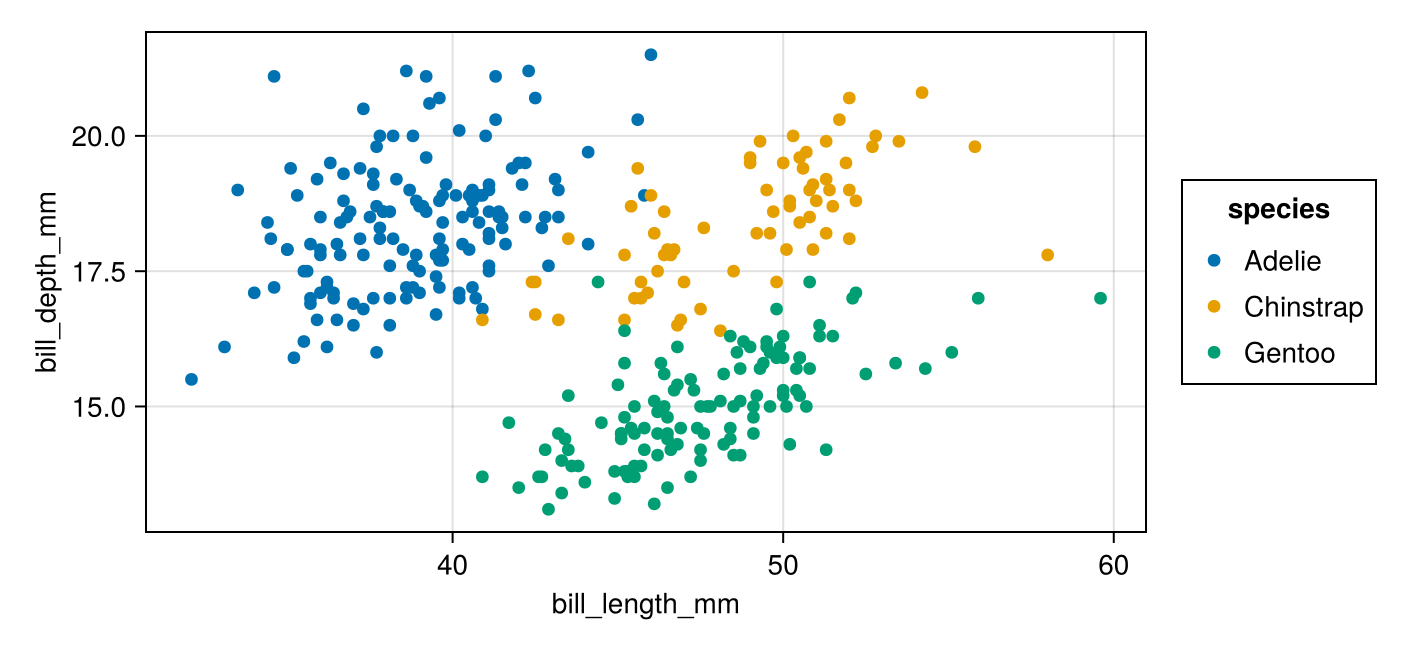

In [26]:
using PalmerPenguins, DataFrames
using AlgebraOfGraphics
using CairoMakie

penguins = DataFrame(PalmerPenguins.load()) |> dropmissing

plt = data(penguins) * mapping(:bill_length_mm, :bill_depth_mm, color = :species)

axis = (width = 500, height = 250)
draw(plt; axis = axis)

---

There is more, 

- It can split figure using `col` and `row` as seaborn.
- Different styles.
- Select the visual type with specific parameters.

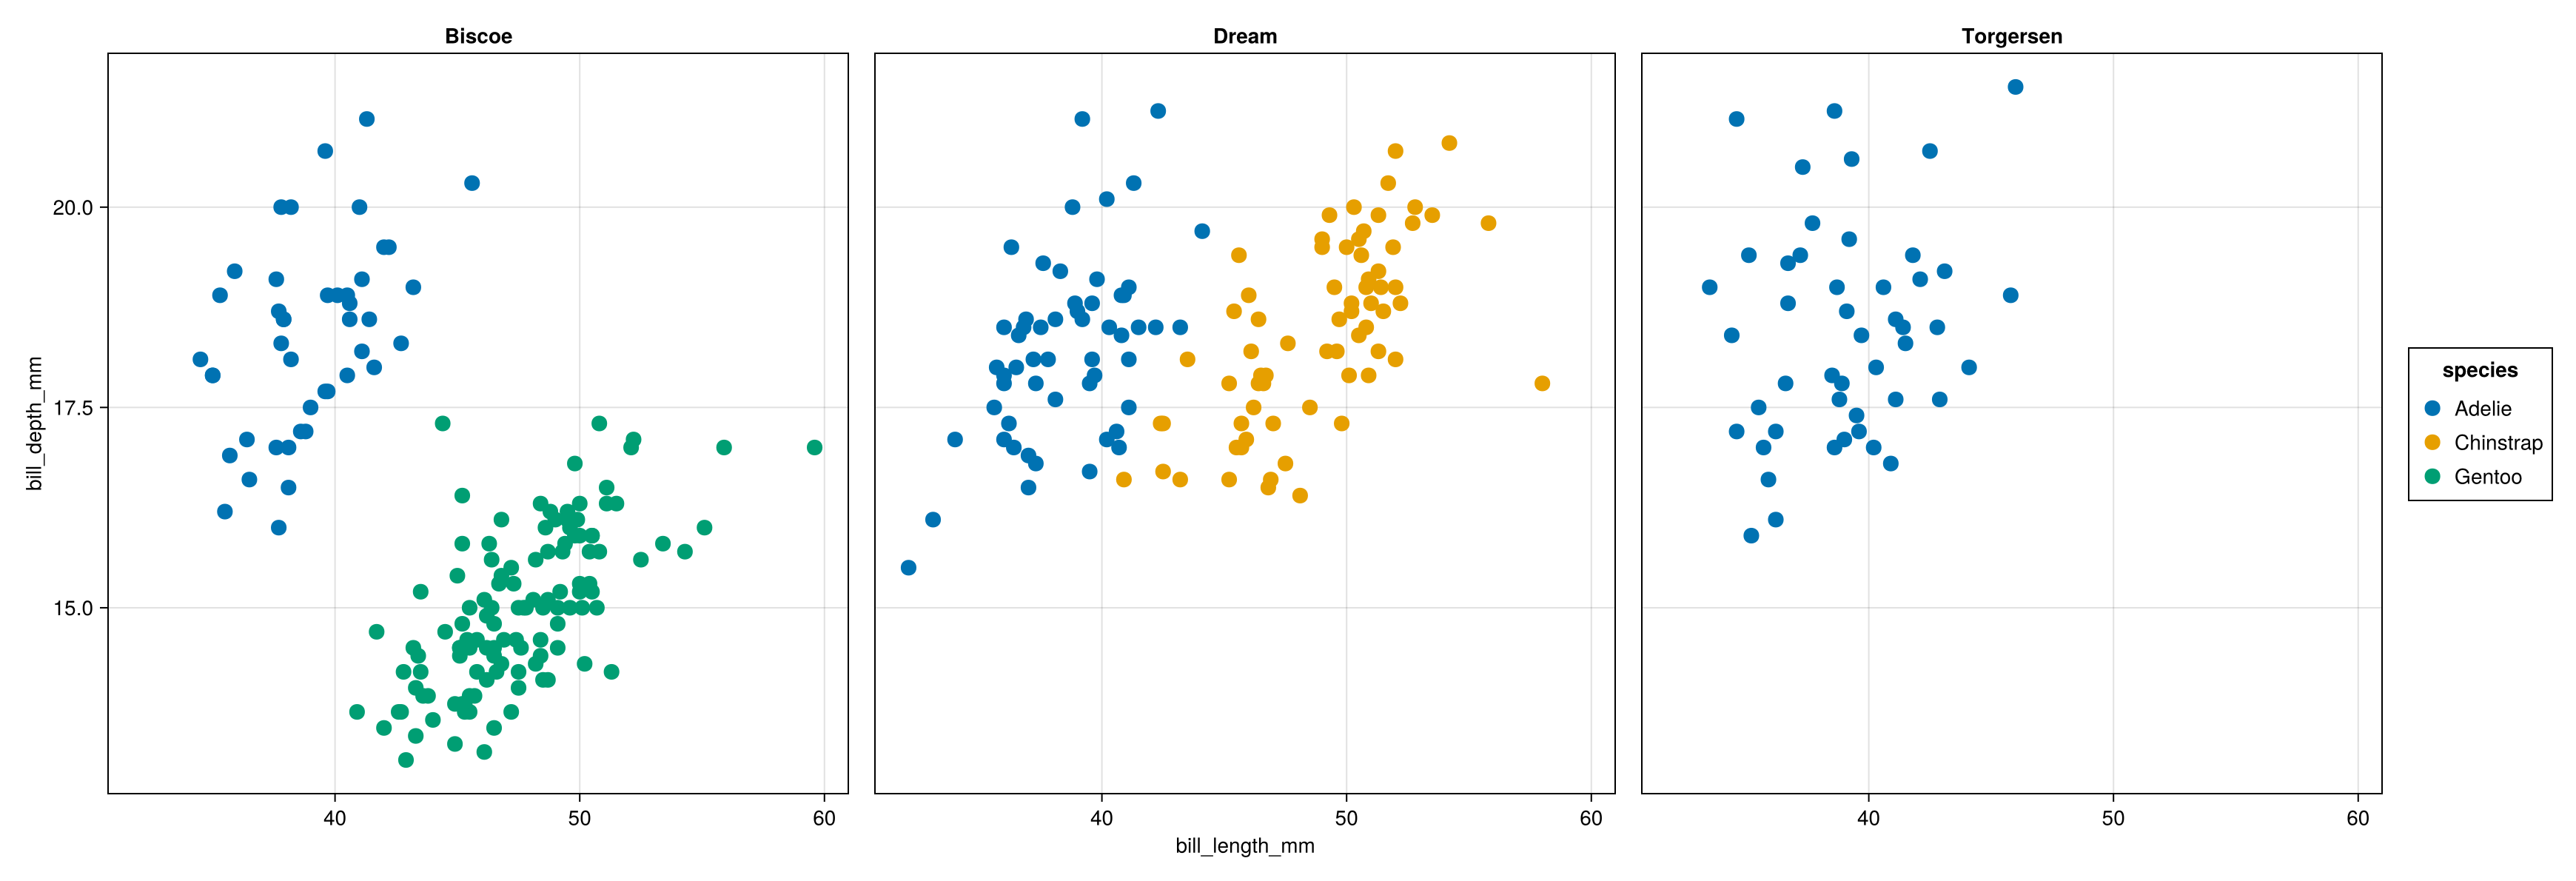

In [27]:
plt2 = plt * mapping(col=:island) * visual(Scatter, markersize=15)

draw(plt2; axis = (width = 500, height = 500))

## Extra coming from R: TidierPlot.jl

- Similar to TidierData, using ggplot.


geom_point
data: inherits from plot
x: inherits from plot 
y: inherits from plot 



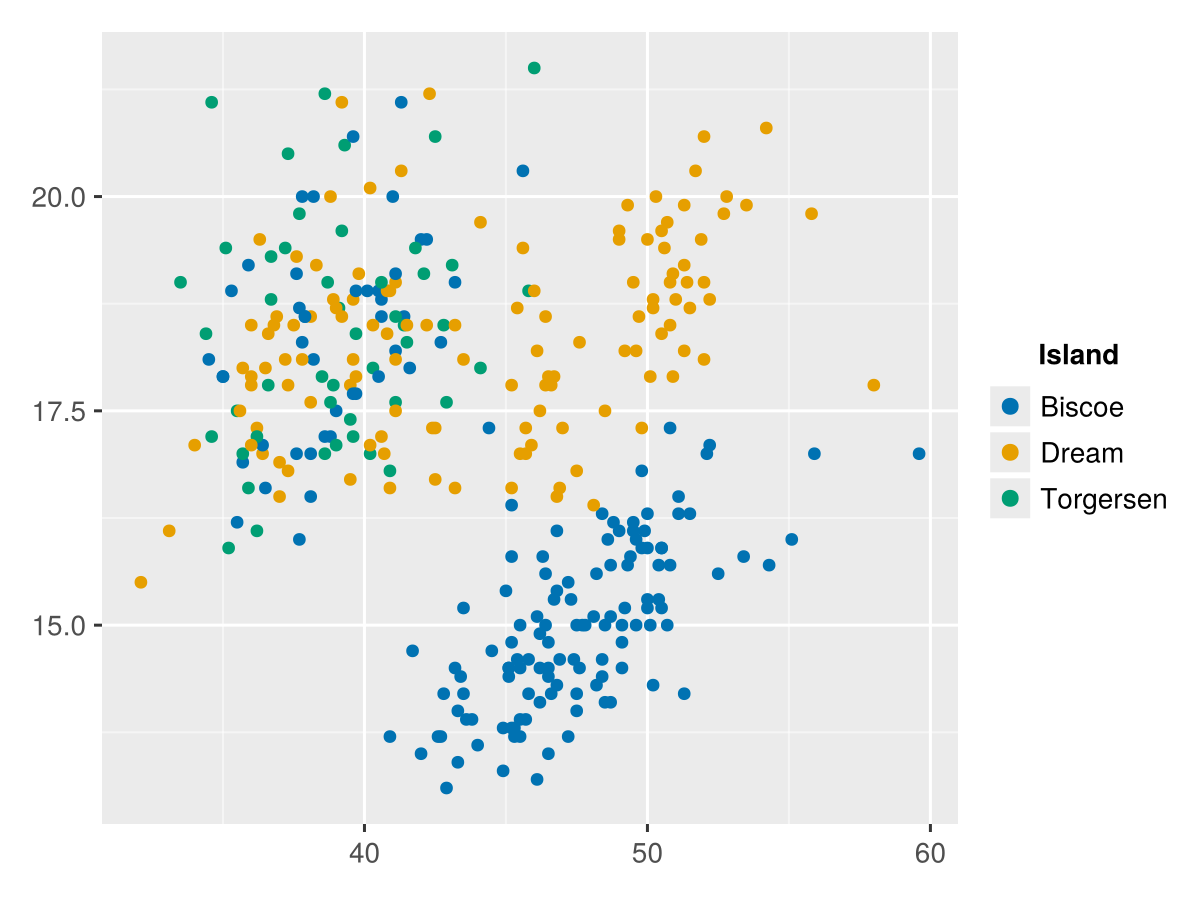

ggplot options
data: A DataFrame (333 rows, 7 columns)
x: bill_length_mm
color: island
y: bill_depth_mm

In [28]:
using Tidier

ggplot(penguins, @aes(x=bill_length_mm, y=bill_depth_mm, color=island)) + geom_point()

## Conclusions about Visualization in Julia

- It is good.

- Makie has a great documentation.

- AlgebraOfGraphics is nice, worse documentation.

- TidierPlots work, but there are missing features (like `facet_wrap`).

. . .

::: {style="margin-top: 100px; font-size: 2em; color: red;"}
Conclusion: Make is madure and documented, AlgebraOfGraphics should improve.
:::



# Machine Learning: MLJ

## Library MLJ.jl

- It tries to be the `scikit-learn` for Julia.

- It is a global wrapping API, does not implement algorithms.

- Models Implemented in different packages: DecisionTrees.jl, MLFlux.jl, ParallelKMeans.jl, .....

- include also models from `scikit-learn`, by `ScikitLearn.jl`.

- Tuning.

- Compatible packages for imbalanced data.

## MLJ Ecosystem

![](images/MLJ_stack.svg)

## MLJ Example

In [29]:
 using MLJ

 iris = load_iris();
selectrows(iris, 1:3) |> pretty

┌──────────────┬─────────────┬──────────────┬─────────────┬──────────────────────────────────┐
│ sepal_length │ sepal_width │ petal_length │ petal_width │ target                           │
│ Float64      │ Float64     │ Float64      │ Float64     │ CategoricalValue{String, UInt32} │
│ Continuous   │ Continuous  │ Continuous   │ Continuous  │ Multiclass{3}                    │
├──────────────┼─────────────┼──────────────┼─────────────┼──────────────────────────────────┤
│ 5.1          │ 3.5         │ 1.4          │ 0.2         │ setosa                           │
│ 4.9          │ 3.0         │ 1.4          │ 0.2         │ setosa                           │
│ 4.7          │ 3.2         │ 1.3          │ 0.2         │ setosa                           │
└──────────────┴─────────────┴──────────────┴─────────────┴──────────────────────────────────┘


In [30]:
schema(iris)

┌──────────────┬───────────────┬──────────────────────────────────┐
│ names        │ scitypes      │ types                            │
├──────────────┼───────────────┼──────────────────────────────────┤
│ sepal_length │ Continuous    │ Float64                          │
│ sepal_width  │ Continuous    │ Float64                          │
│ petal_length │ Continuous    │ Float64                          │
│ petal_width  │ Continuous    │ Float64                          │
│ target       │ Multiclass{3} │ CategoricalValue{String, UInt32} │
└──────────────┴───────────────┴──────────────────────────────────┘


Schema are the types, you can convert.

## Checking the possible models

In [31]:
y, X = unpack(iris, ==(:target); rng=123);
# Check the possible models for these data
models(matching(X,y))

54-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :constructor, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :target_in_fit, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostClassifier, package_name = MLJScikitLearnInterface, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = MLJScikitLearnInterface, ... )
 (name = BayesianLDA, package_name = MLJScikitLearnInterface, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )


## Applying a specific model

In [32]:
# Load the class from the package
Tree = @load DecisionTreeClassifier pkg=DecisionTree

model = Tree()
# Apply Cross validation

evaluate(model, X, y,
                resampling=CV(nfolds=5, shuffle=true),
                measures=[log_loss, accuracy],
                verbosity=0)

import MLJDecisionTreeInterface ✔


[ Info: For silent loading, specify `verbosity=0`. 


PerformanceEvaluation object with these fields:
  model, measure, operation,
  measurement, per_fold, per_observation,
  fitted_params_per_fold, report_per_fold,
  train_test_rows, resampling, repeats
Extract:
┌───┬──────────────────────┬──────────────┬─────────────┐
│   │ measure              │ operation    │ measurement │
├───┼──────────────────────┼──────────────┼─────────────┤
│ A │ LogLoss(             │ predict      │ 2.64        │
│   │   tol = 2.22045e-16) │              │             │
│ B │ Accuracy()           │ predict_mode │ 0.927       │
└───┴──────────────────────┴──────────────┴─────────────┘
┌───┬───────────────────────────────────┬─────────┐
│   │ per_fold                          │ 1.96*SE │
├───┼───────────────────────────────────┼─────────┤
│ A │ [2.4, 4.81, 1.2, 4.81, 2.22e-16]  │ 2.11    │
│ B │ [0.933, 0.867, 0.967, 0.867, 1.0] │ 0.0584  │
└───┴───────────────────────────────────┴─────────┘


## Comparing several models

In [33]:
RF = @load RandomForestClassifier pkg=DecisionTree

for (name, model) in [("DT", Tree()), ("RandomForest", RF())]
    sal = evaluate(model, X, y,
                resampling=CV(nfolds=5, shuffle=true),
                measures=[log_loss, accuracy],
                verbosity=0)
    log, accu = sal.measurement
    println("$(name): $log, $accu")
end

import MLJDecisionTreeInterface ✔
DT: 2.4029102259411435, 0.9333333333333333
RandomForest: 0.10900185892933019, 0.9466666666666667


[ Info: For silent loading, specify `verbosity=0`. 


## Training and then applying a model

In [34]:
using MLJBase

RF = @load RandomForestClassifier pkg=DecisionTree

model = RF()
# holdout = Holdout(fraction_train=0.7, shuffle=true, rng=35)
train_index, test_index = partition(eachindex(y), 0.7, shuffle=true, rng=35)
mach = machine(model, X, y)
# Training
fit!(mach, rows=train_index)
# Predict
first(predict(mach, rows=test_index), 5)

import MLJDecisionTreeInterface ✔


[ Info: For silent loading, specify `verbosity=0`. 
[ Info: Training machine(RandomForestClassifier(max_depth = -1, …), …).


5-element UnivariateFiniteVector{Multiclass{3}, String, UInt32, Float64}:
 UnivariateFinite{Multiclass{3}}(setosa=>0.0, versicolor=>1.0, virginica=>0.0)
 UnivariateFinite{Multiclass{3}}(setosa=>0.0, versicolor=>0.23, virginica=>0.77)
 UnivariateFinite{Multiclass{3}}(setosa=>0.01, versicolor=>0.93, virginica=>0.06)
 UnivariateFinite{Multiclass{3}}(setosa=>0.0, versicolor=>0.19, virginica=>0.81)
 UnivariateFinite{Multiclass{3}}(setosa=>1.0, versicolor=>0.0, virginica=>0.0)

## Conclusions about MLJ

- It is extremely well documented.

- In continuous improvement.
- There is a step-learning from scikit-learn, specially about the scitypes.
- Include TunedModels, but it is not so confortable as scikit-learn.

- It can use scikit-learn models, but the error messages in that case are not good.

. . .

::: {style="margin-top: 100px; font-size: 2em; color: red;"}
Conclusion: Good Tool, it compensates for learning, but worse than scikit-learn.
:::

# Deep Learning: Flux.jl and Lux.jl

## Deep Learning: Flux.jl and Tools

- Flux.jl is the package for Deep Learning.

- Lux is another one without mutation.

- Both works in GPU, with worse performance than PyTorch.

- All implemented in Julia, source code easy to read.

- Installation without problem.

- Very easy the API, errors few intuitive.

- Metalhead.jl includes Convolutional models, but few have pre-trained values.

- Implementation of FastAI, make easier to work with Flux models.

::: {style="margin-top: 50px; font-size: 2em; color: red;"}
Conclusion: Still not mature enough for DL for complex usage.
:::

# Symbolic Regression

## Symbolic Regression

- SymbolicRegression.jl is a great package.

- Wrapper using PySR in Python.

- Successfully used in enterprise optimization problem.

::: {style="margin-top: 50px; font-size: 2em; color: red;"}
Conclusion: In my opinion the best SR package in Julia/Python. The Python package make easier to incorporate it.
:::

# Conclusions {.bigger}

- Julia is a great language for scientific computation.

- Julia is ready for preprocessing, Data Manipulation and Visualization.

- MLJ is rather ready for ML problems, it requires adaptation.

- Deep Learning in Julia is interesting, but it still not mature enough for complex problems.

- Wrapping Julia packages in Python packages seems a good strategy.

. . .

::: {style="margin-top: 50px; font-size: 2em; color: red;"}
Conclusion: You should consider Julia for preprocessing, visualization, and for several excelent packages.
:::



## Thank you for your attention

![](images/minions_en.gif){ width="90%" fig-align=center}